## Computer Vision

In this notebook I will be following along with Ryan Holbrooks course on Computer Vision.

The goal of this exercise is to learn how to use and train convolutional neural networks to recognize images such as cars, dogs, or bridges. 

In [2]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

plt.rc('figure', autolayout=True)
plt.rc('axes',labelweight='bold',labelsize='large',
        titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings('ignore')

ds_train_ = image_dataset_from_directory(
    'train/',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128,128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = True
)

ds_valid_ = image_dataset_from_directory(
    'valid/',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128,128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = False    
)

def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
    )

ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
    )

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [4]:
# Import the module used in the exercises Inception v1
# Note: This model is depreciated, at the time of writing v3 is the most updated
# but we will use v1 for the purpose of the course
import tensorflow_hub as hub

pretrained_base = tf.keras.models.load_model('model/inceptionV1')

In [8]:
# Attaching the model head

from tensorflow import keras
from tensorflow.keras import layers

# Ensures that we aren't training over the base
pretrained_base.trainable=False

model = keras.Sequential([pretrained_base, layers.Flatten()])
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Train the model

In [10]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.1)
model.compile(optimizer=optimizer,
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'],
              )

Training history will take about 40 minutes

In [12]:
history = model.fit( ds_train, validation_data = ds_valid,
                    epochs=30,
                    verbose = 0
                    )

<Axes: >

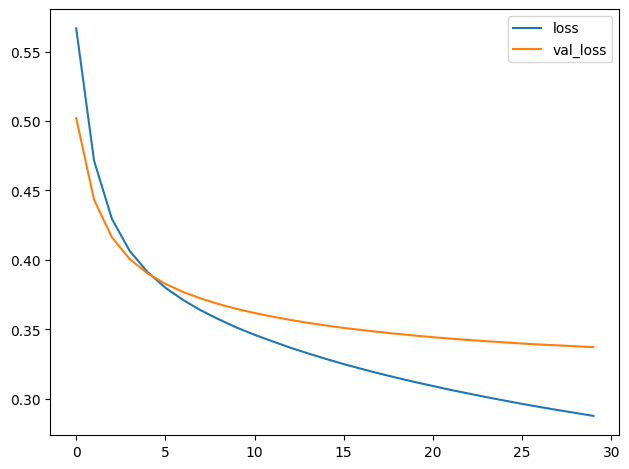

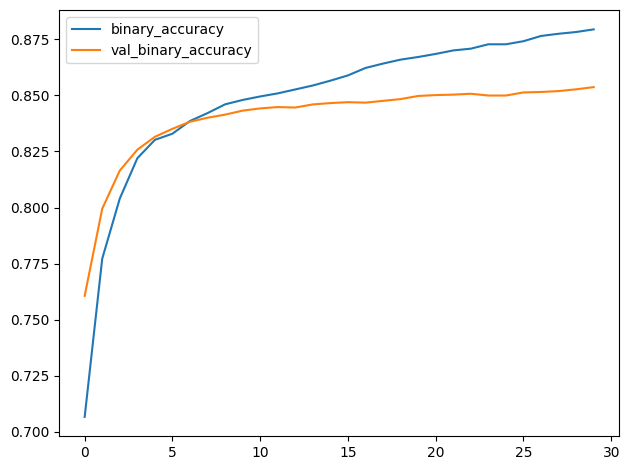

In [13]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['binary_accuracy', 'val_binary_accuracy']].plot()

By using a pre-trained base we were able to get a very clean model, as opposed to the original example where the model had dramatic swings in its predictions